In [7]:
!pip install mlXtend

In [1]:
import pandas as pd 
from mlxtend.frequent_patterns import apriori ,association_rules
from mlxtend.preprocessing import TransactionEncoder

#Association rules BOOK

In [2]:
df=pd.read_csv("C:\\Users\\91892\\Downloads\\course\\assig 9 Association rules\\book.csv")

In [3]:
df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
df.mean()
df.var()
df.std()

ChildBks     0.494159
YouthBks     0.431668
CookBks      0.495340
DoItYBks     0.450086
RefBks       0.410578
ArtBks       0.427797
GeogBks      0.447129
ItalCook     0.317282
ItalAtlas    0.188809
ItalArt      0.214874
Florence     0.311089
dtype: float64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [6]:
df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [7]:
frequent_itemsets=apriori(df,min_support=0.1,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [8]:
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=0.2)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.184,0.652482,1.542511,0.064714,1.660347


In [9]:
rules.sort_values("lift",ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
77,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
80,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

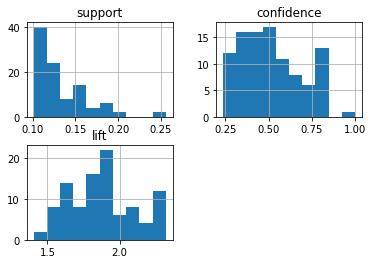

In [10]:
rules[["support","confidence","lift"]].hist()

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

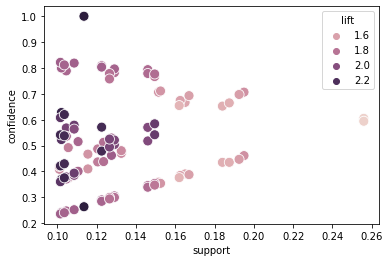

In [12]:
sns.scatterplot(data=rules,x='support',y='confidence',hue='lift',s=100)
plt.show()

##Association rules_ MOVIES

In [13]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [14]:
df=pd.read_csv("C:\\Users\\91892\\Downloads\\course\\assig 9 Association rules\\my_movies.csv")

In [15]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [17]:
df1=df.iloc[:,5:]
df1

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [18]:
frequent_itemsets = apriori(df1, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [19]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.2)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
3,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
245,(Harry Potter1),"(LOTR1, Green Mile, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
246,(LOTR2),"(LOTR1, Green Mile, Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
247,(LOTR1),"(Green Mile, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
248,(Green Mile),"(LOTR1, Sixth Sense, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


In [20]:
rules.sort_values("lift", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
200,"(Sixth Sense, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
182,"(LOTR1, Green Mile)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
228,"(LOTR1, Green Mile, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
227,"(Sixth Sense, Harry Potter1, LOTR2)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.0,0.09,inf
157,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.0,10.0,0.09,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>],
       [<AxesSubplot:title={'center':'lift'}>, <AxesSubplot:>]],
      dtype=object)

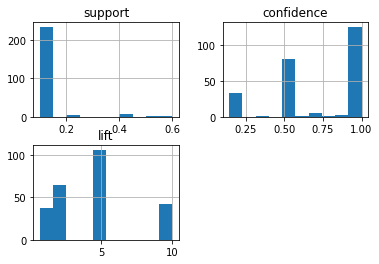

In [21]:
rules[['support','confidence','lift']].hist()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

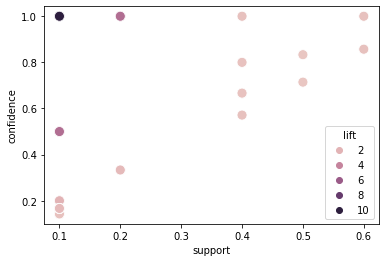

In [23]:

sns.scatterplot(data=rules,x='support',y='confidence',hue='lift', s= 100)
plt.show()

### To eliminate the redudancy in rules

In [24]:
def to_list(i):
    return (sorted(list(i)))

ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)

ma_X

0                               [Sixth Sense, Gladiator]
1                               [Gladiator, Sixth Sense]
2                                   [LOTR1, Sixth Sense]
3                                   [Sixth Sense, LOTR1]
4                           [Sixth Sense, Harry Potter1]
                             ...                        
245    [Harry Potter1, Green Mile, LOTR1, LOTR2, Sixt...
246    [LOTR2, Green Mile, Harry Potter1, LOTR1, Sixt...
247    [LOTR1, Green Mile, Harry Potter1, LOTR2, Sixt...
248    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
249    [Sixth Sense, Green Mile, Harry Potter1, LOTR1...
Length: 250, dtype: object

In [25]:
ma_X = ma_X.apply(sorted)
ma_X

0                               [Gladiator, Sixth Sense]
1                               [Gladiator, Sixth Sense]
2                                   [LOTR1, Sixth Sense]
3                                   [LOTR1, Sixth Sense]
4                           [Harry Potter1, Sixth Sense]
                             ...                        
245    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
246    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
247    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
248    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
249    [Green Mile, Harry Potter1, LOTR1, LOTR2, Sixt...
Length: 250, dtype: object

In [26]:
rules_sets = list(ma_X)

unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))


    
rules_no_redudancy  = rules.iloc[index_rules,:]

In [27]:
rules_no_redudancy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
36,(Green Mile),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.600
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.080
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
18,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.050
136,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
192,"(Green Mile, Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
88,"(Green Mile, Sixth Sense)",(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.600
32,(Green Mile),(Harry Potter1),0.2,0.2,0.1,0.500000,2.500000,0.06,1.600
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960
16,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.050


In [28]:
rules_no_redudancy.sort_values('lift',ascending=False).head(30)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
136,"(Green Mile, Sixth Sense, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
106,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
118,"(LOTR1, Green Mile)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
24,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
30,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.800
178,"(LOTR1, Green Mile, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
150,"(LOTR1, Sixth Sense, LOTR2)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
130,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
64,"(LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
164,"(LOTR1, Green Mile, Sixth Sense)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


In [29]:
rules_no_redudancy.sort_index()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.800
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.800
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960
6,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.200
8,(Sixth Sense),(LOTR2),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.960
10,(Sixth Sense),(LOTR),0.6,0.1,0.1,0.166667,1.666667,0.04,1.080
12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
14,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.800
16,(Gladiator),(LOTR),0.7,0.1,0.1,0.142857,1.428571,0.03,1.050
18,(Gladiator),(Braveheart),0.7,0.1,0.1,0.142857,1.428571,0.03,1.050
